# The dockstring dataset

In this tutorial we download, load, and explore dockstring's dataset
of docking scores for ~250k molecules against 58 targets (proteins).

In [1]:
# Import everything- install missing libraries as needed
# (everything here is quite standard)

from pathlib import Path
import random
import math

import matplotlib.pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw

from dockstring import load_target

## 1. Downloading the dataset

If you haven't downloaded the dataset,
run the following lines of code in your terminal (from the repository root directory!)
to download the dataset.
These lines of code are also given dockstring's README.

```bash
mkdir -p datasets
wget -O datasets/dockstring-dataset.tsv https://figshare.com/ndownloader/files/30562257?private_link=95f2fed733dec170b998
```

In [2]:
dataset_path = Path("../datasets/dockstring-dataset.tsv")
assert dataset_path.exists()  # Throw an error if the dataset is missing!

## 2. Loading the dataset with pandas

Here we read in the dataset using the `pandas` library.

In [3]:
df = pd.read_csv(dataset_path, sep="\t")  # since our dataset is tab-delimited
df

,inchikey,smiles,PPARD,ABL1,ADAM17,ADRB1,ADRB2,AKT2,MAOB,CASP3,...,EGFR,F10,GBA,MAPK1,MAPK14,PLK1,SRC,THRB,F2,KDR
0,UMVWYQXKBPJMOF-UHFFFAOYNA-N,C1=C(C2=C(C=C1O)OC(C(C2=O)=O)C3=CC=C(C(=C3)O)O)O,-8.2,-9.1,-9.0,-9.3,-9.7,-8.7,-8.4,-7.2,...,-9.1,-8.4,-9.1,-9.3,-8.3,-9.0,-8.4,-8.8,-8.2,-8.0
1,NGOGFTYYXHNFQH-UHFFFAOYNA-N,O=S(=O)(N1CCNCCC1)C2=CC=CC=3C2=CC=NC3,-7.1,-9.5,-7.0,-7.6,-7.7,-8.2,-6.3,-6.1,...,-7.5,-6.6,-8.0,-8.3,-6.9,-8.6,-7.7,-8.1,-6.8,-7.4
2,BGVLELSCIHASRV-QPEQYQDCNA-N,C=1C=C2S/C(/N(CC)C2=CC1OC)=C\C(=O)C,-6.6,-7.4,-5.9,-7.0,-7.0,-7.1,-6.9,-5.5,...,-6.6,-5.9,-6.4,-7.1,-6.3,-7.0,-6.2,-7.9,-5.8,-6.2
3,KTUFNOKKBVMGRW-RPGFEBOUNA-N,C=1(N=C(C=2C=NC=CC2)C=CN1)NC=3C=C(NC(C4=CC=C(C...,-10.8,-10.2,-11.0,-10.4,-11.5,-11.0,-3.3,-9.4,...,-11.0,-9.0,-9.3,-10.2,-8.8,-10.4,-9.5,-7.4,-9.7,-11.4
4,LLJRXVHJOJRCSM-UHFFFAOYNA-N,C1=CC=2C(=CNC2C=C1)C=3C=CN=CC3,-7.7,-8.6,-7.4,-8.4,-8.2,-7.7,-7.9,-6.2,...,-8.0,-7.0,-7.7,-8.0,-7.8,-7.9,-6.8,-8.5,-6.6,-7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260150,DWPVTFJKTGBFRK-UHFFFAOYNA-N,ClC1=CC(S(=O)(=O)N2N=NC=3C2=CC=CC3)=C(OCC)C=C1,-7.5,-9.0,-7.8,-8.1,-8.4,-7.8,-7.4,-6.9,...,-8.0,-7.8,-8.2,-8.3,-7.3,-8.2,-7.6,-8.7,-7.8,-7.8
260151,GZKYOKRGPTXXIJ-YAQRNVERNA-N,ClC=1C=CC(C(=O)NN=C2CCCC2)=CC1,-8.1,-8.6,-8.0,-8.1,-8.1,-7.3,-8.5,-6.3,...,-7.9,-7.1,-8.0,-7.6,-7.0,-8.2,-7.0,-8.3,-7.2,-8.2
260152,SFJOYBYSPNCEKG-UHFFFAOYNA-N,O=C1N(C(=O)N(C2=C3N(C(=C21)C4=CC=CC=C4)C=5C(N=...,-8.9,-10.3,-9.6,-11.5,-7.7,-8.9,-6.3,-8.9,...,-10.5,-9.5,-8.7,-8.8,-8.2,-10.9,-9.1,-6.3,-9.2,-7.5
260153,QUXNNXZZXGGGPV-UHFFFAOYNA-N,O=C(N1C=2C(C(=C1)C(OC)=O)=CC=CC2)C3=CC(=C(C=C3...,-9.6,-9.3,-9.1,-9.3,-9.7,-8.0,-8.8,-7.9,...,-8.7,-8.1,-8.8,-8.6,-8.3,-9.2,-8.7,-11.1,-7.7,-7.0


The columns of the dataset are the inchikey (a sort of "hash" of the molecule),
its SMILES string,
and the names of all 58 targets.
This makes 60 columns in total.

In [4]:
print(df.columns)
len(df.columns)

Index(['inchikey', 'smiles', 'PPARD', 'ABL1', 'ADAM17', 'ADRB1', 'ADRB2',
       'AKT2', 'MAOB', 'CASP3', 'DHFR', 'ESR2', 'PTK2', 'FGFR1', 'HMGCR',
       'HSP90AA1', 'KIT', 'MAPKAPK2', 'MAP2K1', 'NOS1', 'PARP1', 'PDE5A',
       'PGR', 'PTPN1', 'ROCK1', 'AKT1', 'AR', 'CDK2', 'CSF1R', 'ESR1', 'NR3C1',
       'IGF1R', 'JAK2', 'LCK', 'MET', 'MMP13', 'PTGS2', 'PPARA', 'PPARG',
       'REN', 'ADORA2A', 'ACHE', 'BACE1', 'CA2', 'CYP2C9', 'CYP3A4', 'HSD11B1',
       'DPP4', 'DRD2', 'DRD3', 'EGFR', 'F10', 'GBA', 'MAPK1', 'MAPK14', 'PLK1',
       'SRC', 'THRB', 'F2', 'KDR'],
      dtype='object')


60

## 3. Exploring the dataset

We do some limited exploration here.

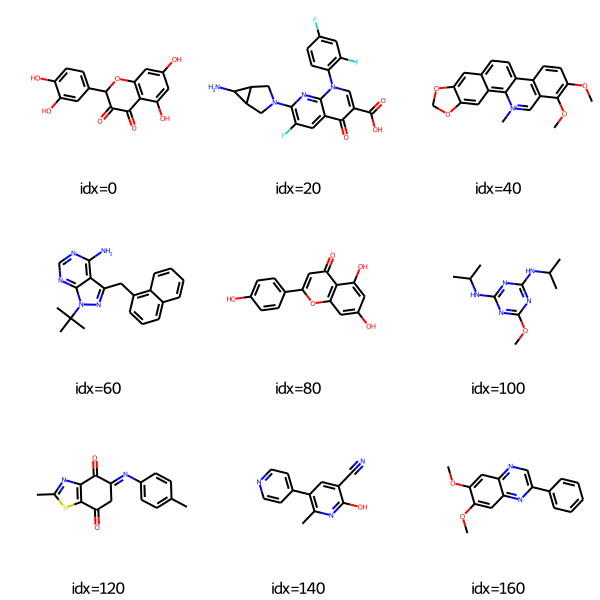

In [5]:
# Visualize a few SMILES from the dataset
indices = range(0, 161, 20)
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(df["smiles"][i]) for i in indices],
    legends=[f"idx={i}" for i in indices]
)

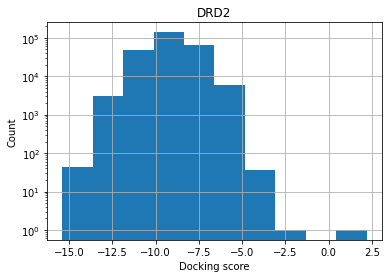

In [6]:
# Histogram of docking scores
df.hist(column="DRD2")
plt.xlabel("Docking score")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

## 4. Verifying the dataset

The entries in the dockstring dataset should correspond
exactly to the output of running dockstring on a given SMILES/target pair.
Here, we verify this.

In [7]:
# Verify one specific example
target_name = "F2"
i = 111  # change as you would like
smiles = df.iloc[i]["smiles"]
dataset_score = df.iloc[i][target_name]
print(f"SMILES #{i}: {smiles}")
print(f"Score in dataset: {dataset_score}")

target = load_target(target_name)
score, aux = target.dock(smiles)
print(f"Score calculated here: {score}")

SMILES #111: ClC1=CC=C(OC(N2N=CN=C2)C(O)C(C)(C)C)C=C1
Score in dataset: -7.0
Score calculated here: -7.0


In [8]:
# Verify a few random examples (cell will crash if it fails)
random.seed(0)
for trial in range(16):
    i = random.randrange(len(df))
    target_name = random.choice(df.columns[2:])
    
    smiles = df.iloc[i]["smiles"]
    dataset_score = df.iloc[i][target_name]
    target = load_target(target_name)
    score, aux = target.dock(smiles)
    
    # Check that they are close (or both nan)
    assert math.isclose(dataset_score, score) or (math.isnan(dataset_score) and math.isnan(score))
    print(f"Trial {trial} succeeded! (row {i}, target {target_name}, score={score})")

Trial 0 succeeded! (row 221360, target AR, score=-7.2)
Trial 1 succeeded! (row 198693, target F2, score=-8.1)
Trial 2 succeeded! (row 110250, target ADAM17, score=-9.5)
Trial 3 succeeded! (row 67873, target MET, score=-9.5)
Trial 4 succeeded! (row 127383, target CDK2, score=-8.2)
Trial 5 succeeded! (row 240709, target GBA, score=-7.7)
Trial 6 succeeded! (row 217540, target PDE5A, score=-6.4)
Trial 7 succeeded! (row 253702, target JAK2, score=-7.4)
Trial 8 succeeded! (row 93860, target REN, score=-8.5)
Trial 9 succeeded! (row 233743, target HSP90AA1, score=-7.6)
Trial 10 succeeded! (row 132300, target DHFR, score=-8.5)
Trial 11 succeeded! (row 73882, target DHFR, score=-10.4)
Trial 12 succeeded! (row 198129, target MAOB, score=-3.0)
Trial 13 succeeded! (row 162101, target MAPK1, score=-8.8)
Trial 14 succeeded! (row 65668, target PTGS2, score=-8.3)
Trial 15 succeeded! (row 257631, target DPP4, score=-8.8)
